In [1]:
import pandas as pd

movie_data = pd.read_csv("../data/movie_data.csv")
movie_ratings = pd.read_csv("../data/movie_ratings.csv")


In [2]:
movie_data.head()

,Movie_id,Title,Genres,Release_year,Runtime,Language,Adult
0,1236153,Mercy,"[878, 28, 53]",2026.0,99,en,False
1,1272837,28 Years Later: The Bone Temple,"[27, 53, 878]",2026.0,109,en,False
2,1244975,The Orphans,[28],2025.0,95,fr,False
3,1301306,A Woman Scorned,[28],2025.0,84,en,False
4,1523145,Your Heart Will Be Broken,"[10749, 18]",2026.0,0,ru,False


In [3]:
removed_indexes = movie_data.loc[movie_data.Runtime == 0].index.tolist()
removed_indexes += movie_data.loc[movie_data.Runtime.isna()].index.tolist()

In [4]:
removed_indexes += movie_data.loc[movie_data.isna().any(axis=1)].index.tolist()

In [5]:
removed_indexes += movie_data.loc[movie_data.Language == "xx"].index.tolist()

In [6]:
movie_data.drop(index=removed_indexes, inplace=True)
movie_data

,Movie_id,Title,Genres,Release_year,Runtime,Language,Adult
0,1236153,Mercy,"[878, 28, 53]",2026.0,99,en,False
1,1272837,28 Years Later: The Bone Temple,"[27, 53, 878]",2026.0,109,en,False
2,1244975,The Orphans,[28],2025.0,95,fr,False
3,1301306,A Woman Scorned,[28],2025.0,84,en,False
5,840464,Greenland 2: Migration,"[12, 53, 878]",2026.0,98,en,False
...,...,...,...,...,...,...,...
10011,214140,McCanick,"[80, 18, 53]",2014.0,96,en,False
10012,552934,Erased,[18],2018.0,81,sl,False
10013,47819,Americathon,[35],1979.0,84,en,False
10014,653484,Paranormal Roommates,"[16, 35]",2013.0,8,en,False


In [7]:
languages = movie_data["Language"].unique()
languages

<StringArray>
['en', 'fr', 'zh', 'es', 'no', 'ja', 'te', 'pt', 'ar', 'de', 'cs', 'ko', 'tl',
 'cn', 'fi', 'tr', 'nl', 'th', 'hi', 'kn', 'as', 'it', 'sr', 'lv', 'pl', 'ml',
 'da', 'ru', 'mn', 'ta', 'id', 'sv', 'ms', 'uk', 'hr', 'ro', 'et', 'hu', 'pa',
 'ca', 'el', 'ga', 'sl', 'sq', 'bn', 'sh', 'sk', 'eu', 'sw', 've', 'is', 'mr',
 'fa', 'si', 'ur', 'st', 'lt', 'bg', 'yi', 'he', 'lb', 'bs', 'af', 'jv', 'az',
 'mo', 'nb', 'wo']
Length: 68, dtype: str

In [8]:
movie_ratings.head()

,Movie_id,Vote_average,Vote_count
0,1236153,7.080,480
1,1272837,7.211,608
2,1244975,6.100,50
3,1301306,6.000,9
4,1523145,0.000,0


In [9]:
movie_ratings.loc[movie_ratings.isna().any(axis=1)]

,Movie_id,Vote_average,Vote_count


In [10]:
movie_ratings.drop(removed_indexes, inplace=True)
movie_ratings

,Movie_id,Vote_average,Vote_count
0,1236153,7.080,480
1,1272837,7.211,608
2,1244975,6.100,50
3,1301306,6.000,9
5,840464,6.526,504
...,...,...,...
10011,214140,4.600,48
10012,552934,6.500,6
10013,47819,3.500,11
10014,653484,5.000,2


Text(0.5, 1.0, 'Distribution of Movie Ratings')

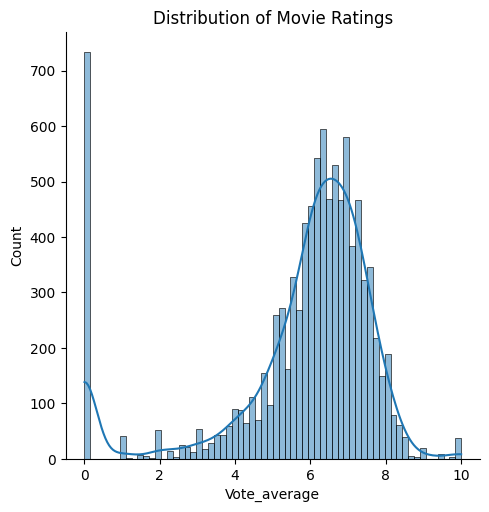

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(movie_ratings["Vote_average"], kde=True)
plt.title("Distribution of Movie Ratings")



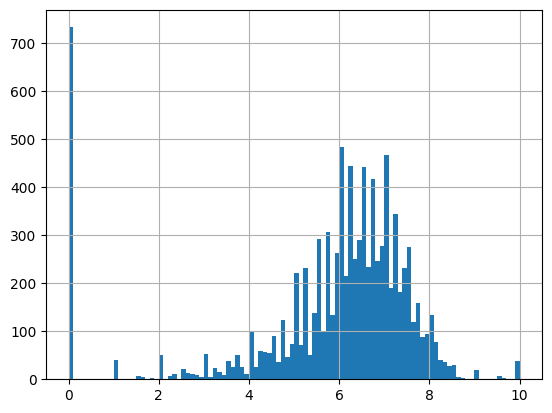

In [12]:
movie_ratings['Vote_average'].hist(bins=100)
plt.show()

Text(0.5, 1.0, 'Distribution of Movie Ratings')

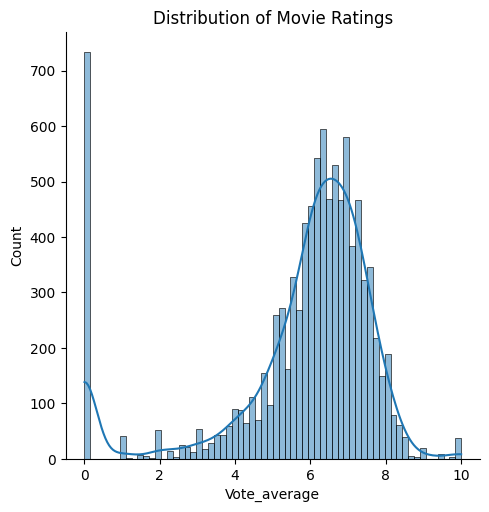

In [13]:
sns.displot(movie_ratings["Vote_average"], kde=True)
plt.title("Distribution of Movie Ratings")

Text(0.5, 1.0, 'Count of Movies with and without Ratings')

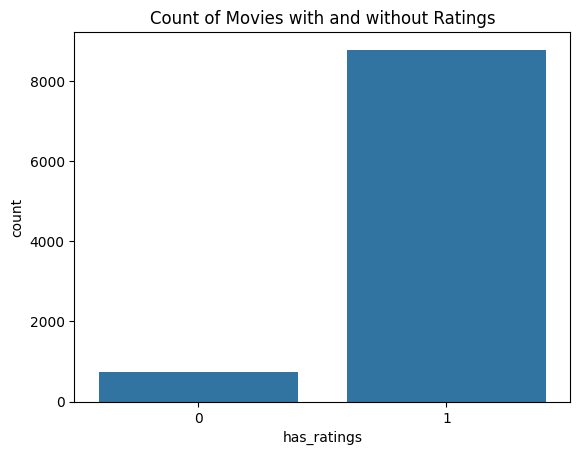

In [14]:
movie_ratings['has_ratings'] = (movie_ratings['Vote_average'] > 0).astype(int)
sns.countplot(x='has_ratings', data=movie_ratings)
plt.title("Count of Movies with and without Ratings")

In [15]:
movie_ratings

,Movie_id,Vote_average,Vote_count,has_ratings
0,1236153,7.080,480,1
1,1272837,7.211,608,1
2,1244975,6.100,50,1
3,1301306,6.000,9,1
5,840464,6.526,504,1
...,...,...,...,...
10011,214140,4.600,48,1
10012,552934,6.500,6,1
10013,47819,3.500,11,1
10014,653484,5.000,2,1


In [16]:
import ast
genre_data = pd.read_csv("../data/movie_genres.csv")
def genre_encoding(movie_genre_list):
  genre_encode_list = [0]*len(genre_data['Genre_name'].unique())
  genre_names = genre_data['Genre_id'].loc[genre_data['Genre_id'].isin(movie_genre_list)].index.tolist()
  for genre in genre_names:
    genre_encode_list[genre_data['Genre_name'].unique().tolist().index(genre_data['Genre_name'].iloc[genre])] = 1
  return genre_encode_list
  
encoded_data = []
for row in movie_data["Genres"]:
  encoded_data.append(genre_encoding(ast.literal_eval(row)))

column_names = [f"Genre_{genre}" for genre in genre_data['Genre_name'].unique()]
genre_encoded_data = pd.DataFrame(encoded_data, columns=column_names)
genre_encoded_data

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9510,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9511,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9512,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
movie_data

,Movie_id,Title,Genres,Release_year,Runtime,Language,Adult
0,1236153,Mercy,"[878, 28, 53]",2026.0,99,en,False
1,1272837,28 Years Later: The Bone Temple,"[27, 53, 878]",2026.0,109,en,False
2,1244975,The Orphans,[28],2025.0,95,fr,False
3,1301306,A Woman Scorned,[28],2025.0,84,en,False
5,840464,Greenland 2: Migration,"[12, 53, 878]",2026.0,98,en,False
...,...,...,...,...,...,...,...
10011,214140,McCanick,"[80, 18, 53]",2014.0,96,en,False
10012,552934,Erased,[18],2018.0,81,sl,False
10013,47819,Americathon,[35],1979.0,84,en,False
10014,653484,Paranormal Roommates,"[16, 35]",2013.0,8,en,False


In [18]:
movie_data.reset_index(drop=True, inplace=True)
genre_encoded_data.reset_index(drop=True, inplace=True)
movie_data = pd.concat([movie_data, genre_encoded_data], axis=1)
movie_data

,Movie_id,Title,Genres,Release_year,Runtime,Language,Adult,Genre_Action,Genre_Adventure,Genre_Animation,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
0,1236153,Mercy,"[878, 28, 53]",2026.0,99,en,False,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1272837,28 Years Later: The Bone Temple,"[27, 53, 878]",2026.0,109,en,False,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1244975,The Orphans,[28],2025.0,95,fr,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1301306,A Woman Scorned,[28],2025.0,84,en,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,840464,Greenland 2: Migration,"[12, 53, 878]",2026.0,98,en,False,0,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,214140,McCanick,"[80, 18, 53]",2014.0,96,en,False,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9510,552934,Erased,[18],2018.0,81,sl,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9511,47819,Americathon,[35],1979.0,84,en,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9512,653484,Paranormal Roommates,"[16, 35]",2013.0,8,en,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
movie_data.drop(columns=["Genres"], inplace=True)
movie_data

,Movie_id,Title,Release_year,Runtime,Language,Adult,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
0,1236153,Mercy,2026.0,99,en,False,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1272837,28 Years Later: The Bone Temple,2026.0,109,en,False,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1244975,The Orphans,2025.0,95,fr,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1301306,A Woman Scorned,2025.0,84,en,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,840464,Greenland 2: Migration,2026.0,98,en,False,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,214140,McCanick,2014.0,96,en,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9510,552934,Erased,2018.0,81,sl,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9511,47819,Americathon,1979.0,84,en,False,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9512,653484,Paranormal Roommates,2013.0,8,en,False,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Distribution of Scaled Movie Runtimes')

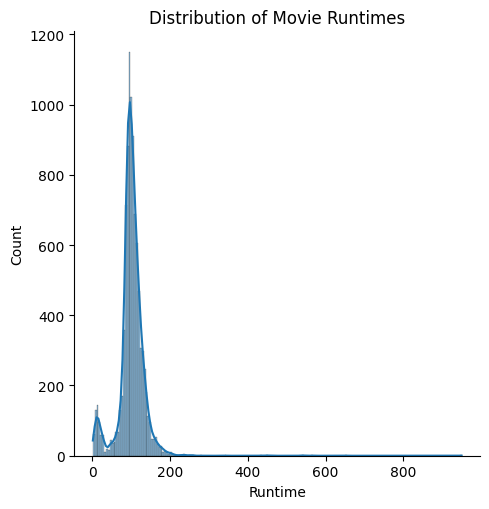

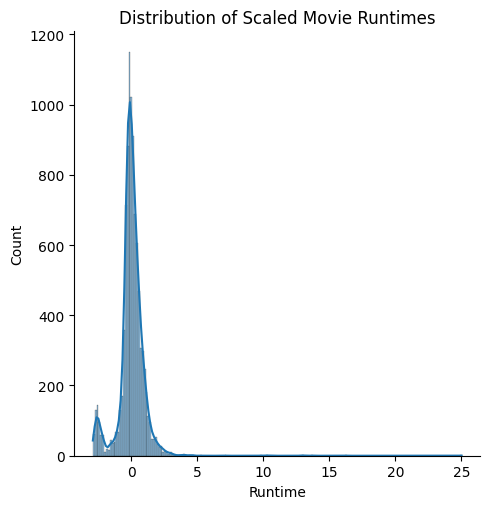

In [20]:
from sklearn.preprocessing import StandardScaler

sns.displot(movie_data["Runtime"], kde=True)
plt.title("Distribution of Movie Runtimes")

scaler = StandardScaler()
movie_data["Runtime"] = scaler.fit_transform(movie_data[["Runtime"]])

sns.displot(movie_data["Runtime"], kde=True)
plt.title("Distribution of Scaled Movie Runtimes")

Text(0.5, 1.0, 'Distribution of Scaled Movie Release Years')

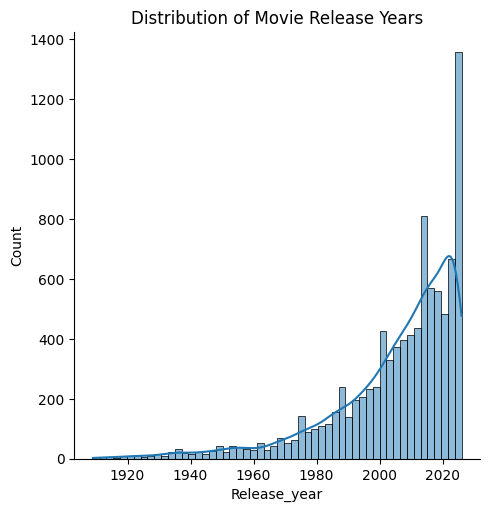

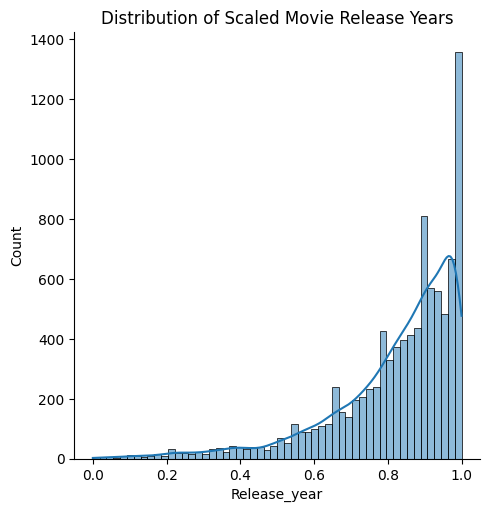

In [21]:
from sklearn.preprocessing import MinMaxScaler

sns.displot(movie_data["Release_year"], kde=True)
plt.title("Distribution of Movie Release Years")

scaler = MinMaxScaler()
movie_data["Release_year"] = scaler.fit_transform(movie_data[["Release_year"]])
sns.displot(movie_data["Release_year"], kde=True)
plt.title("Distribution of Scaled Movie Release Years")
